In [29]:
!ls /Users/yoavfreund/projects/facesAnalysis/videos/19\ Days\ And\ Counting-JxQKYgw9G2k.mp4
!ls /Users/yoavfreund/projects/facesAnalysis/output/19\ Days\ And\ Counting-JxQKYgw9G2k*.pkl

/Users/yoavfreund/projects/facesAnalysis/videos/19 Days And Counting-JxQKYgw9G2k.mp4
/Users/yoavfreund/projects/facesAnalysis/output/19 Days And Counting-JxQKYgw9G2k_Faces.pkl
/Users/yoavfreund/projects/facesAnalysis/output/19 Days And Counting-JxQKYgw9G2k_Tracks.pkl


In [30]:
filename = "/Users/yoavfreund/projects/facesAnalysis/videos/19 Days And Counting-JxQKYgw9G2k.mp4"
filename

'/Users/yoavfreund/projects/facesAnalysis/videos/19 Days And Counting-JxQKYgw9G2k.mp4'

In [31]:
%pylab inline
import cv2
import pickle

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [9]:
frontal='/Users/yoavfreund/projects/opencv/data/haarcascades/haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(frontal)

In [32]:
def imshow_rgb(image_bgr,Title=''):
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    imshow(image_rgb)
    if Title != '':
        title(Title)

In [11]:
vid = cv2.VideoCapture(filename)
i=0;
Faces_List=[]
while True:
    flag,frame=vid.read()
    if not flag:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(100, 100),
        flags = cv2.cv.CV_HAAR_SCALE_IMAGE
    )
    Faces_List.append(faces)
    print 'index=',i,'faces=',faces
    i+=1



index= 0 faces= [[967 210 203 203]]
index= 1 faces= [[979 219 189 189]]
index= 2 faces= [[718  80 178 178]]
index= 3 faces= [[721  81 173 173]
 [279 175 151 151]]
index= 4 faces= [[719  78 177 177]
 [280 179 145 145]]
index= 5 faces= [[720  80 178 178]
 [285 184 137 137]]
index= 6 faces= [[723  82 175 175]
 [285 181 141 141]]
index= 7 faces= [[721  80 176 176]
 [285 182 139 139]]
index= 8 faces= [[722  80 175 175]
 [285 182 139 139]]
index= 9 faces= [[719  78 183 183]
 [284 180 143 143]]
index= 10 faces= [[719  79 180 180]
 [282 180 142 142]]
index= 11 faces= [[718  81 180 180]
 [286 183 137 137]]
index= 12 faces= [[721  86 177 177]
 [284 182 141 141]]
index= 13 faces= [[283 180 144 144]
 [726  86 177 177]]
index= 14 faces= [[284 182 139 139]
 [743  89 169 169]]
index= 15 faces= [[286 183 137 137]
 [755  85 167 167]]
index= 16 faces= [[284 183 139 139]
 [758  76 173 173]]
index= 17 faces= [[922 414 105 105]
 [759  69 178 178]
 [282 181 143 143]]
index= 18 faces= [[765  71 176 176]
 [28

KeyboardInterrupt: 

In [7]:
pickle.dump(Faces_List,open('Faces.pkl','w'));

In [26]:
def show_faces(i):
    vid = cv2.VideoCapture(filename)
    for j in range(i-1):
        vid.grab()
    flag,image = vid.read()
    faces=list(Faces_List[i])
    print faces
    for (x, y, w, h) in faces:
        if h>150 and x>400:
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    imshow_rgb(image,'frame '+str(i))
    #I=extract_face(i,image)
    #imshow_rgb(I,'frame '+str(i))

[array([283, 182, 141, 141], dtype=int32), array([863,  89, 166, 166], dtype=int32)]


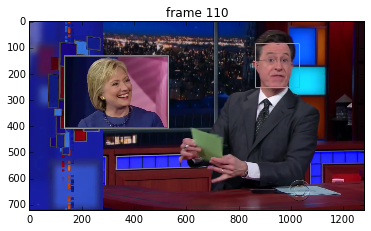

In [27]:
show_faces(110)

In [21]:
Faces_List[58:63]

[array([[577,  66, 179, 179]], dtype=int32),
 array([[579,  70, 169, 169]], dtype=int32),
 array([[575,  74, 168, 168],
        [623, 269, 108, 108]], dtype=int32),
 array([[624, 270, 109, 109],
        [572,  73, 168, 168]], dtype=int32),
 array([[625, 270, 107, 107],
        [568,  79, 157, 157]], dtype=int32)]

In [39]:
size=300
def extract_face(box,image):
    image_h,image_w,c=shape(image)
    x,y,w,h=face
    y0=y+h/2
    y0=min(image_h-size/2,max(size/2,y0))
    x0=x+w/2
    x0=min(image_w-size/2,max(size/2,x0))
    ymin=y0-size/2; ymax=ymin+size
    xmin=x0-size/2; xmax=xmin+size
    return (i,x0,y0,w,h,image[ymin:ymax,xmin:xmax,:])


In [45]:
import cv2
fourcc = fourcc = cv2.cv.CV_FOURCC(*'mp4v') #cv2.VideoWriter_fourcc('mp4v')
out = cv2.VideoWriter('/Users/yoavfreund/projects/facesAnalysis/output/19 Days And Counting-JxQKYgw9G2k.mp4',fourcc, 20.0, (size,size))

Tracks_File='/Users/yoavfreund/projects/facesAnalysis/output/19 Days And Counting-JxQKYgw9G2k_Tracks.pkl'
Tracks=pickle.load(open(Tracks_File,'r'))
track=Tracks[0]

vid = cv2.VideoCapture(filename)
Windows=[]
j=-1
t_i=0
track_i=0

while True:
    j+=1
    flag,image = vid.read()
    if not flag:
        print 'got to video file EOF'
        break
    if track[t_i,0]>j:
        continue
    face=track[t_i,1:]
    t_i+=1
    if t_i>=shape(track)[0]:
        pickle.dump(Windows,open())
        track_i+=1
        break
        if track_i>=len(Tracks):
            break
        print 'processing track ',track_i
        track=Tracks[track_i]
        t_i=0
        j-=1
        continue
    I=extract_face(face,image)
    out.write(I[-1])
    Windows.append(I)
    if j % 10 == 0:
        print '\r',j,
out.release()

440


In [47]:
Windows_filename='/Users/yoavfreund/projects/facesAnalysis/output/19 Days And Counting-JxQKYgw9G2k_Windows.pkl'
pickle.dump(Windows,open(Windows_filename,'w'))

In [10]:
one_square = np.array([[i]+list(Faces_List[i][0])\
                       for i in range(len(Faces_List))\
                       if len(Faces_List[i])==1])
one_square[:10,:]

array([[ 58, 577,  66, 179, 179],
       [ 59, 579,  70, 169, 169],
       [ 63, 563,  80, 159, 159],
       [ 64, 560,  84, 150, 150],
       [ 65, 560,  86, 148, 148],
       [ 66, 561,  86, 148, 148],
       [ 67, 562,  88, 147, 147],
       [ 72, 573,  88, 152, 152],
       [ 73, 574,  84, 159, 159],
       [ 76, 580,  91, 150, 150]])

In [17]:
mean_loc = mean(one_square,axis=0)[1:]
std_loc = std(one_square,axis=0)[1:]
mean_loc,std_loc

diffs = one_square[1:,:]-one_square[:-1,:]
consec=diffs[diffs[:,0]==1,:]

mean_diff=mean(consec,axis=0)[1:]
std_diff=std(consec,axis=0)[1:]
mean_diff,std_diff, mean_loc,std_loc

(array([-0.28520286,  0.07955449, -0.01193317, -0.01193317]),
 array([ 7.98094662,  5.49180662,  3.94390066,  3.94390066]),
 array([ 691.27150146,  139.62973761,  156.96902332,  156.96902332]),
 array([ 94.43538432,  36.27407119,  15.4134512 ,  15.4134512 ]))

In [18]:
def check_face(face):
    Z=0;
    for p in range(4):
        Z+=((face[p]-mean_loc[p])/(sqrt(2)*std_loc[p]))**2
    return Z

def check_shift(face,prev_face):
    Z=0
    for p in range(4):
        Z+=((face[p]-prev_face[p])/(sqrt(2)*std_diff[p]))**2
    return Z
def find_first_one(list):
    for i in range(len(list)):
        if list[i]==1:
            return i
    return -1  # return -1 if did not find a 1 in list

In [23]:
del range

In [65]:
Z_threhold=10.0
def find_match_with_current(current,Range=5):
    # Look for matches with box in current frame
    for this_box in Faces_List[current]:
        if check_face(this_box)>Z_threhold:
            continue
        for step in range(Range,1,-1):
            for Delta in [step,-step]:
                i=current+Delta
                for that_box in Faces_List[i]:
                    if check_face(that_box)>Z_threhold:
                        continue
                    Z=check_shift(this_box,that_box)
                    if Z<1:
                        return (this_box,i,that_box,Z)
    return None
                    
def find_match_btwn_neighbors(current,Range=5):
    # look for matches between frames before and after
    for gap in range(2*Range,2,-1):
        for left in range(current-gap+1,current):
            right=left+gap
            for left_box in Faces_List[left]:
                if check_face(left_box)>Z_threhold:
                    continue
                for right_box in Faces_List[right]:
                    if check_face(right_box)>Z_threhold:
                        continue
                    Z=check_shift(left_box,right_box)
                    if Z<2:
                        return (left_box,left,right_box,right,Z)

In [67]:
Cleaned_Faces_List=[]
for current in range(len(Faces_List)):        
    match=find_match_with_current(current)
    if not match is None:
        print current,'withFrame',match[0],check_face(match[0])
        Cleaned_Faces_List.append((current,match[0]))
    else:
        match = find_match_btwn_neighbors(current)
        if match is None:
            print 'No Match'
            Cleaned_Faces_List.append((current,None))
        else:
            left_box,left_i,right_box,right_i,Z=match
            left_weight=right_i-current
            right_weight=current - left_i
            box=((left_weight*left_box)+(right_weight*right_box))/(left_weight+right_weight)
            box=box.astype(int)
            print current,'btwn neighbors',box,check_face(box)
            Cleaned_Faces_List.append((current,box))

No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
No Match
59 withFrame [579  70 169 169] 3.1582941798
No Match
61 withFrame [572  73 168 168] 2.99676009722
No Match
63 btwn neighbors [568  79 156 156] 2.25277235717
64 withFrame [560  84 150 150] 2.34652967072
65 withFrame [560  86 148 148] 2.39766670817
66 withFrame [561  86 148 148] 2.38300300686
67 withFrame [562  88 147 147] 2.36816952378
68 withFrame [564  89 148 148] 2.22083058983
69 withFrame [567  89 148 148] 2.17852146947
70 withFrame [567  88 154 154] 1.915881305

In [36]:
current=100
Range=5
boxes=[]
for i in range(current-Range,current+Range):
    for box in Faces_List[i]:
        Z= check_face(box)
        if Z<5:
            print i,box
            boxes.append((i,box))
for i1 in range(len(boxes)):
    for i2 in range(i1+1,len(boxes)):
        Z=check_shift(boxes[i1][1],boxes[i2][1])
        if Z<1:
            print Z, boxes[i1][0],boxes[i2][0]

95 [515 104 163 163]
96 [511 106 165 165]
97 [505 107 168 168]
98 [503 112 163 163]
99 [499 115 162 162]
100 [495 116 164 164]
101 [491 118 165 165]
102 [491 123 161 161]
103 [488 125 160 160]
104 [484 127 162 162]
0.449073428436 95 96
0.877788955337 96 97
0.339092779754 98 99
0.831933412076 98 100
0.399338581444 99 100
0.256201368102 100 101
0.201252439101 102 103
0.714185707073 102 104
0.449073428436 103 104


In [62]:
Z_threshold=5
Z2_threshold=2
Cleaned_Faces_List=[]
Well_selected=0;
No_Detections=0;
Single_Detection=0;
Multiple_faces=0;
Failure=0
for i in range(len(Faces_List)):
    faces=Faces_List[i]
    if len(faces)==0:
        No_Detections+=1
        Cleaned_Faces_List.append((i,None))
        continue
    elif len(faces)==1:
        Single_Detection+=1
        last_face=faces[0]
        last_good_frame=i
        Cleaned_Faces_List.append((i,last_face))
    else:
        Multiple_faces+=1;
        Zs=[]; Zs2=[]
        for face in faces:
            Zs.append(check_face(face))
            Zs2.append(check_shift(face,last_face))
            
        good_by_prior=[1 for j in range(len(Zs)) if Zs[j]<Z_threshold]
        count_good = sum(good_by_prior)
        if count_good==1:
            index=find_first_one(good_by_prior)
            last_face=faces[index]
            last_good_frame=i
            Cleaned_Faces_List.append((i,last_face))
            Well_selected+=1;
        if count_good !=1:
            if i-last_good_frame<5:
                good_by_shift=[1 for j in range(len(Zs2)) if Zs2[j]<Z2_threshold]
                if sum(good_by_shift)==1:
                    index=find_first_one(good_by_shift)
                    last_face=faces[index]
                    last_good_frame=i
                    Cleaned_Faces_List.append((i,last_face))
                    Well_selected+=1;
                    continue
            print 'Failure to determine face'
            print 'frame no %d:\n faces=%s\n Zs=%s'%(i,str(faces),str(Zs))
            print 'Zs2=%s'%str(Zs2)
            print 'last good frame=%d, last_face=%s'%(last_good_frame,last_face)
            Cleaned_Faces_List.append((i,None))
            Failure+=1
    
print 'total = ',len(Faces_List)
print "Well_selected=%d No_Detections=%d Single_Detection=%d Multiple_faces=%d, Failure=%d"%\
        (Well_selected, No_Detections, Single_Detection, Multiple_faces, Failure)
      

Failure to determine face
frame no 3311:
 faces=[[526 102 159 159]
 [576  88 170 170]]
 Zs=[2.0868611701037421, 2.4726544921315914]
Zs2=[10.158949020303467, 52.576729587803491]
last good frame=3310, last_face=[535 106 147 147]
Failure to determine face
frame no 3384:
 faces=[[553 284 121 121]
 [568 323 154 154]]
 Zs=[14.43781682988501, 13.66626359685826]
Zs2=[2.5875670882877126, 120.10409127584911]
last good frame=3383, last_face=[552 288 115 115]
total =  4698
Well_selected=1000 No_Detections=952 Single_Detection=2744 Multiple_faces=1002, Failure=2


In [63]:
len(Cleaned_Faces_List)

4698

In [66]:
for j in range(len(Cleaned_Faces_List)):
    if Cleaned_Faces_List[j][1]!= None:
        print j
        break

58


/Users/yoavfreund/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  from ipykernel import kernelapp as app


In [86]:
Zs=[]
for j in range(one_square.shape[0]):
    Zs.append(check_face(one_square[j,:]))

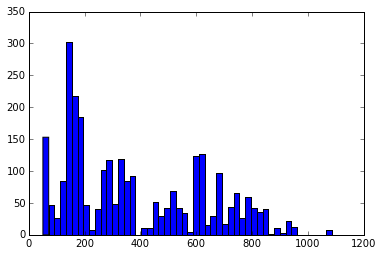

In [89]:
hist(Zs,bins=50);

In [84]:
sqrt(2)

1.4142135623730951

In [5]:
!ls

Face Detection.ipynb


In [22]:
Zs

[39.559450094272272, 2.450251681491709]

In [25]:
sum([1 for Z in Zs if Z<50])

2

In [26]:
faces

()

In [31]:
find(range(10))

In [50]:
sort([2,1,7])

array([1, 2, 7])

In [75]:
range(1)

[0]

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [58]:
numpy.int(np.array([0.2,1.5,3.3]))

TypeError: only length-1 arrays can be converted to Python scalars

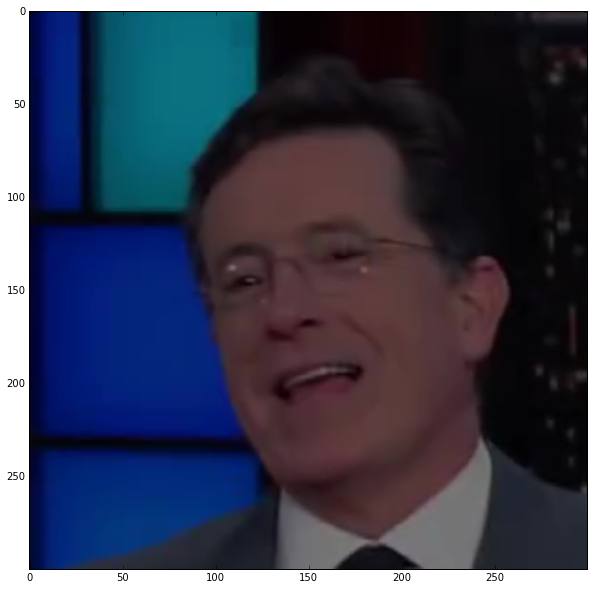

In [112]:
figure(figsize=(10,10))
imshow_rgb(Windows[10][1])

In [96]:
shape(Windows[150][1])

(300, 300, 3)

In [99]:
len(Windows)*3*300*300/1000000.0

864.54

In [118]:
pickle.dump(Windows,open('Windows.pkl','w'),protocol=2);

In [101]:
!ls -lrt

total 1819232
-rw-r--r--  1 yoavfreund  staff     548422 Jun  5 00:51 Face Detection.ipynb
-rw-r--r--  1 yoavfreund  staff     628354 Jun  5 09:16 Faces.pkl
-rw-r--r--@ 1 yoavfreund  staff   64540617 Jun  5 11:47 Bernie Can't Be The Only Candidate With An Ice Cream-z3qN-BU1b2M.mp4
-rw-r--r--  1 yoavfreund  staff     949654 Jun  5 14:10 Face Detection fill holes.ipynb
-rw-r--r--  1 yoavfreund  staff  864769773 Jun  5 14:10 Windows.pkl


In [117]:
[w[:5] for w in Windows[:10]]

[(59, 663, 154, 169, 169),
 (61, 656, 157, 168, 168),
 (63, 646, 157, 156, 156),
 (64, 635, 159, 150, 150),
 (65, 634, 160, 148, 148),
 (66, 635, 160, 148, 148),
 (67, 635, 161, 147, 147),
 (68, 638, 163, 148, 148),
 (69, 641, 163, 148, 148),
 (70, 644, 165, 154, 154)]